In [150]:
import PIL
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [218]:
base_path = './runs/detect/AVM_400_train_ABC_test_A_save_crop_pad_100/crops'
new_path = '../hough_results/images/trial_A/'
os.makedirs(new_path,exist_ok = True)


In [231]:
failures = 0
for this_class in os.listdir(base_path):
    print(this_class)
    os.makedirs(os.path.join(new_path,this_class),exist_ok = True)

    for this_image in tqdm(os.listdir(os.path.join(base_path, this_class))):
        # print(this_image)
        img = cv2.imread(os.path.join(base_path, this_class, this_image))
        # kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        # img = cv2.filter2D(img, -1, kernel)

        # contrast_img = change_contrast(img, 100)
        # binary_img = np.zeros_like(np.array(img)[:,:,0])
        # for i in range(np.array(contrast_img).shape[0]):
        #     for j in range(np.array(contrast_img).shape[1]):
        #         if np.linalg.norm(np.array(contrast_img)[i,j,:] - np.array([255,0,255]))<100:
        #             # print(np.array(new_img)[i,j,:])
        #             binary_img[i,j] = 0 #np.array([0,])
        #         else:
        #             binary_img[i,j] = 1 # np.array([255,255,255])
        img_canny = cv2.Canny(img, 50,100)
        try:
            lines = cv2.HoughLinesP(img_canny, 1,np.pi/180,5, np.array([]), 30, 5)
            # contrast_img.save(os.path.join(new_path,this_class, '{}_high_contrast.jpeg'.format(this_image[:-5])))

            print_img = img.copy()
            points = []
            for line in lines:
                for x1, y1, x2, y2 in line:
                    points.append(((x1 + 0.0, y1 + 0.0), (x2 + 0.0, y2 + 0.0)))
                    cv2.line(print_img, (x1, y1), (x2, y2), (255, 0, 0), 1)

            cv2.imwrite(os.path.join(new_path,this_class, '{}_hough_lines.jpeg'.format(this_image[:-5])), print_img)
            cv2.imwrite(os.path.join(new_path,this_class, '{}_canny_edges.jpeg'.format(this_image[:-5])), img_canny)

        except:
            cv2.imwrite(os.path.join(new_path,this_class, '{}_hough_lines.jpeg'.format(this_image[:-5])), img)
            cv2.imwrite(os.path.join(new_path,this_class, '{}_canny_edges.jpeg'.format(this_image[:-5])), img_canny)
            failures +=1 

        # plt.imsave(os.path.join(new_path,this_class,'{}_binary.jpeg'.format(this_image[:-5])), binary_img, cmap='gray')

print(failures)
                # pass

front


100%|██████████| 458/458 [00:00<00:00, 788.31it/s]


back


100%|██████████| 362/362 [00:00<00:00, 683.00it/s]

0


In [1]:
import cv2
import matplotlib.pyplot as plt

In [58]:
img = cv2.imread('/home/dyros/yhpark/parking_spot_corner_detector/runs/detect/AVM_400_train_ABC_test_A_save_crop_pad_40/crops/back/new_image_120.jpg')

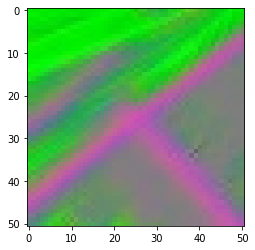

In [59]:
plt.imshow(img)

In [60]:
import numpy as np

In [61]:
new_img = np.zeros(img.shape[:-1])
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j,0]<105 or img[i,j,1]>125 or img[i,j,2]<150:
            new_img[i,j,0]=0
            new_img[i,j,1]=0
            new_img[i,j,2]=0
        else:




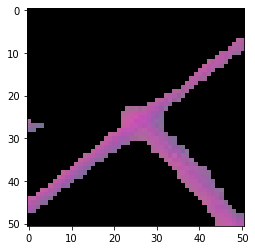

In [62]:
plt.imshow(new_img)

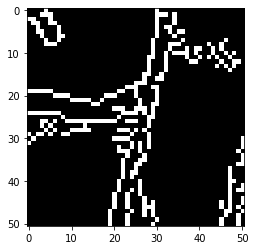

In [173]:
plt.imshow(img_canny, cmap='gray')

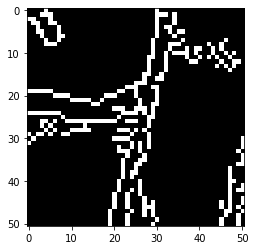

In [174]:
plt.imshow(img_canny,cmap='gray')

In [208]:
lines = cv2.HoughLinesP(img_canny, 1,np.pi/180,12, np.array([]), 15, 10)
# lines = cv2.HoughLinesP(img_canny, 1,np.pi/180,10)

In [209]:
lines

array([[[23, 48, 34,  6]],

       [[ 2, 19, 27, 24]],

       [[ 0, 31, 42,  8]],

       [[ 5, 24, 28, 32]],

       [[19, 50, 32,  1]],

       [[16, 26, 29, 47]],

       [[45, 50, 50, 30]],

       [[32, 10, 49, 12]],

       [[21, 32, 28, 11]],

       [[25, 37, 34,  1]],

       [[ 3, 27, 45,  9]],

       [[ 0, 29, 23, 28]]], dtype=int32)

In [210]:
print_img = img.copy()
points = []
for line in lines:
    for x1, y1, x2, y2 in line:
        points.append(((x1 + 0.0, y1 + 0.0), (x2 + 0.0, y2 + 0.0)))
        cv2.line(print_img, (x1, y1), (x2, y2), (255, 0, 0), 1)


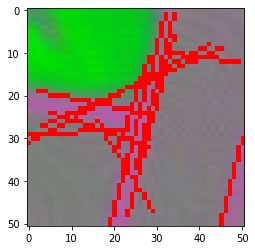

In [211]:
plt.imshow(print_img,cmap='gray')